## Homework_2 Combined Cycle Power Plant - Pavithra Senthilkumar: 8409085494

### a) Downloading and Importing Libraries

In [402]:
import pandas as pd
import numpy as np
import matplotlib as plt

#### Exploring the Data

### b) i) How many rows are in this data set? How many columns? What do the rows and columns represent?

In [405]:
file_path = "data/Folds5x2_pp.ods" 
data = pd.read_excel(file_path, engine="odf")
data.head(4)

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48


#### Ambient variables Temperature (T), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (EP)

In [407]:
print("length or number of rows in data :",len(data))
count=0
for i in data.columns:
    count+=1
print("Total features/columns in the data :",count)

length or number of rows in data : 9568
Total features/columns in the data : 5


#### The columns or features represent the factors in thermodynamic settings including features like Energy Output 
#### The Rows represent the observations or instances in a thermodynamic setting recorded during the period (2006-2011)

### b) ii) Pairwise Scatterplot for all Features

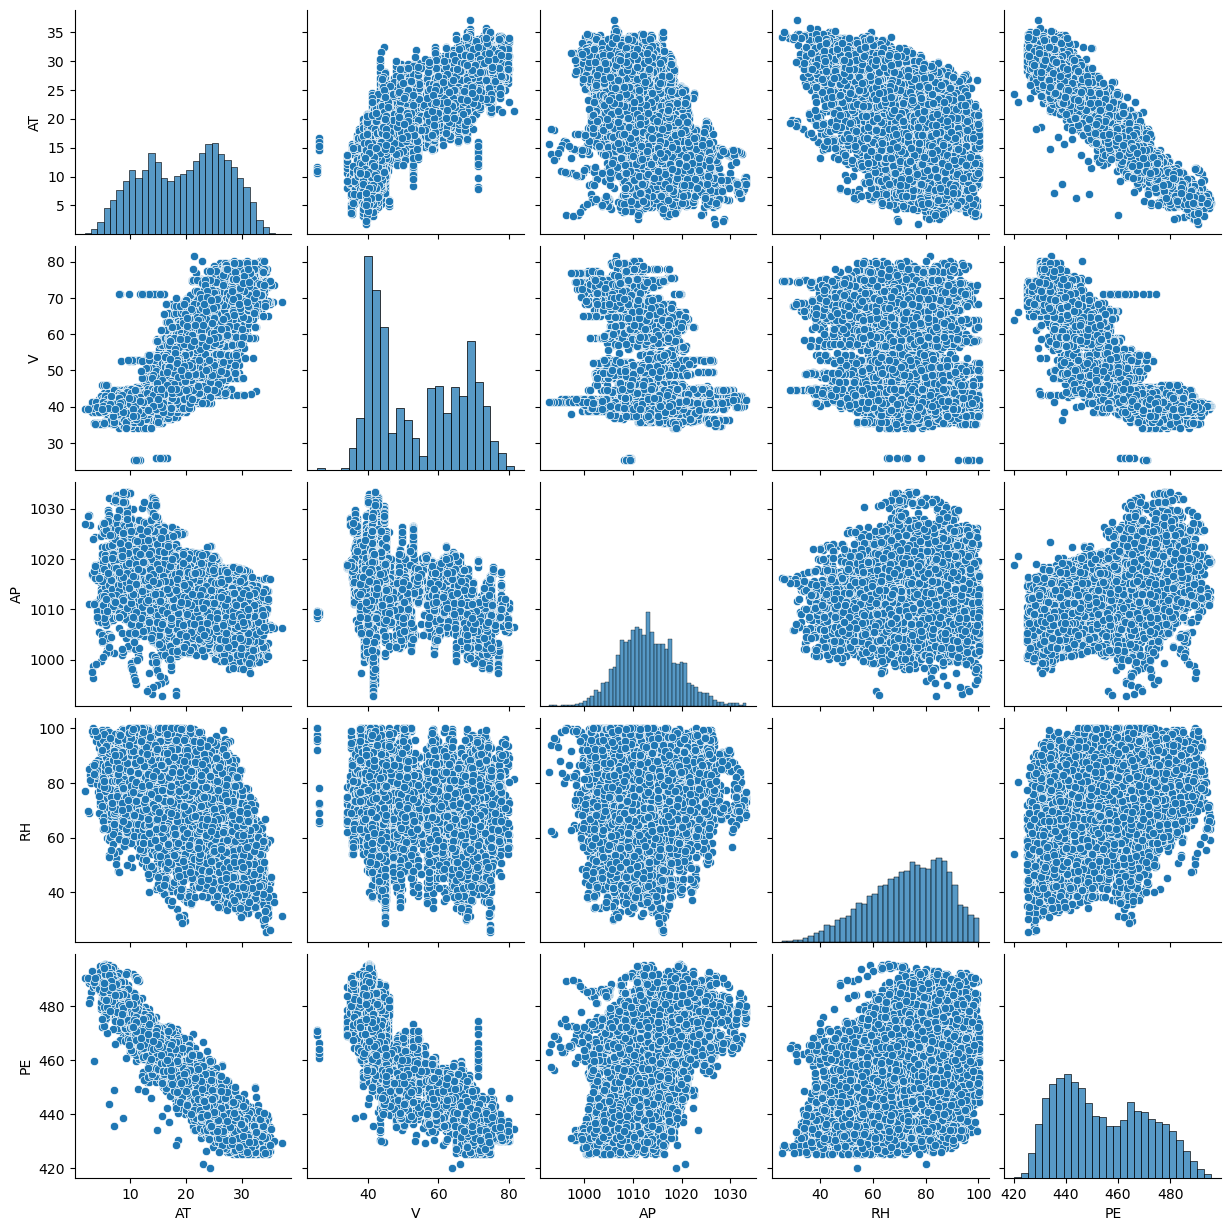

In [410]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(data)

# Show the plot
plt.show()

### Findings from the Scatterplot

##### 1. Exhaust Vaccum and Energy Output Shows a negative Correlation as exhaust vaccum increase, energy output reduces
##### 2. Ambient Temperature and Exhaust Vaccum Shows a Positive Correlation, as temperature rises, vaccum rises too
##### 3. Ambient Temperature and Energy output Shows a negative Correlation, as temperature rises, the energy output reduces
##### 3. Ambient pressure and Energy output Shows a slight positive Correlation, as pressure rises, the energy output rises 

In [413]:
data.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


### b) iii) What are the mean, the median, range, first and third quartiles, and in-terquartile ranges of each of the variables in the dataset? Summarize them in a table.

In [415]:
summary_stats = pd.DataFrame({
    "Mean": data.mean(),
    "Median": data.median(),
    "Range": data.max() - data.min(),
    "Q1 (First Quartile)": data.quantile(0.25),
    "Q3 (Third Quartile)": data.quantile(0.75),
    "IQR (Interquartile Range)": data.quantile(0.75) - data.quantile(0.25)
})

summary_stats

,Mean,Median,Range,Q1 (First Quartile),Q3 (Third Quartile),IQR (Interquartile Range)
AT,19.651231,20.345,35.30,13.5100,25.72,12.2100
V,54.305804,52.080,56.20,41.7400,66.54,24.8000
AP,1013.259078,1012.940,40.41,1009.1000,1017.26,8.1600
RH,73.308978,74.975,74.60,63.3275,84.83,21.5025
PE,454.365009,451.550,75.50,439.7500,468.43,28.6800


### c) For each predictor, fit a simple linear regression model to predict the response. Describe your results. In which of the models is there a statistically significant association between the predictor and the response? Create some plots to back up your assertions. Are there any outliers that you would like to remove from your data for each of these regression tasks?

In [417]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [418]:
predictors = data.columns

In [419]:
response = ['PE']

In [420]:
predictors = predictors.to_list()

In [421]:
predictors.remove('PE')

In [422]:
predictors

['AT', 'V', 'AP', 'RH']

#### Fitting a Regression model for every feature Vs PE (Energy Output)

Fitting Regression Model for PE VS AT
Regression Results for AT:
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Fri, 14 Feb 2025   Prob (F-statistic):               0.00
Time:                        13:11:11   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

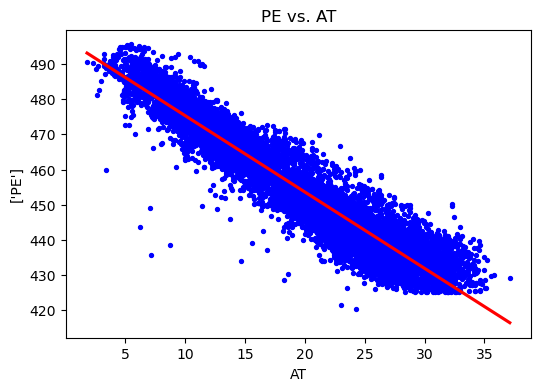

Fitting Regression Model for PE VS V
Regression Results for V:
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Fri, 14 Feb 2025   Prob (F-statistic):               0.00
Time:                        13:11:12   Log-Likelihood:                -33963.
No. Observations:                9568   AIC:                         6.793e+04
Df Residuals:                    9566   BIC:                         6.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

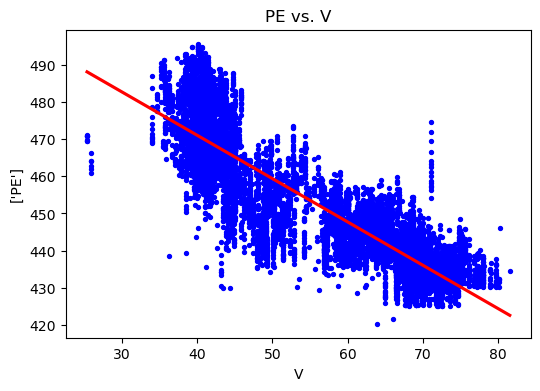

Fitting Regression Model for PE VS AP
Regression Results for AP:
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Fri, 14 Feb 2025   Prob (F-statistic):               0.00
Time:                        13:11:13   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

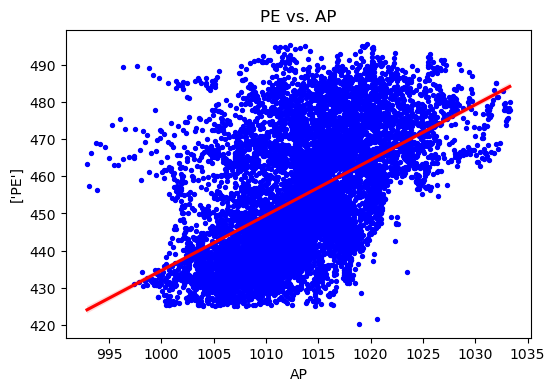

Fitting Regression Model for PE VS RH
Regression Results for RH:
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Fri, 14 Feb 2025   Prob (F-statistic):               0.00
Time:                        13:11:13   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9566   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

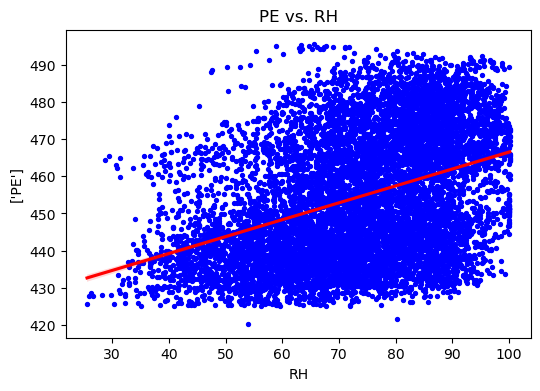

In [424]:
results={}
for predictor in predictors:
    print("Fitting Regression Model for PE VS", predictor)
    X = data[[predictor]]  
    X = sm.add_constant(X)  
    y = data[response]  
    
    model = sm.OLS(y, X).fit() 
    results[predictor] = model 
    
    # Print summary of regression
    print(f"Regression Results for {predictor}:")
    print(model.summary())
    print("-" * 80)

    # Scatterplot with regression line
    plt.figure(figsize=(6, 4))
    sns.regplot(
        x=data[predictor], 
        y=data[response], 
        line_kws={"color": "red"}, 
        scatter_kws={"alpha": 1, "s": 8, "color": "blue"}  # Small (s), dark (color), no transparency (alpha=1)
    )
    plt.xlabel(predictor)
    plt.ylabel(response)
    plt.title(f"PE vs. {predictor}")
    plt.show()


From the Results, it is evident thatThe PE and the ambient temperature is highly correlated and has a R square value of 0.89. It has a p value of 0.00 and relatively high r square indicates that there is a good correlation between the PE and AT.

However, All variables (AT, V, RH, AP) are statistically significant when associated with the response variable PE, since they have p-value <0.05

### Identifying Outliers with Residual Plot

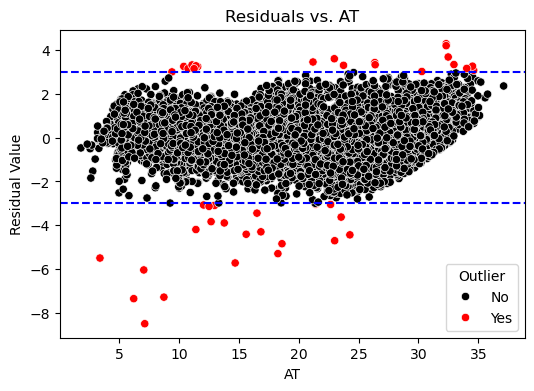

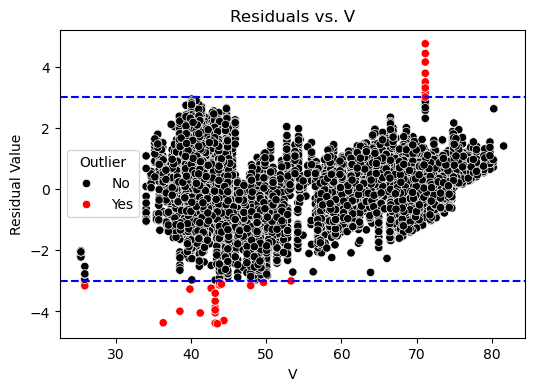

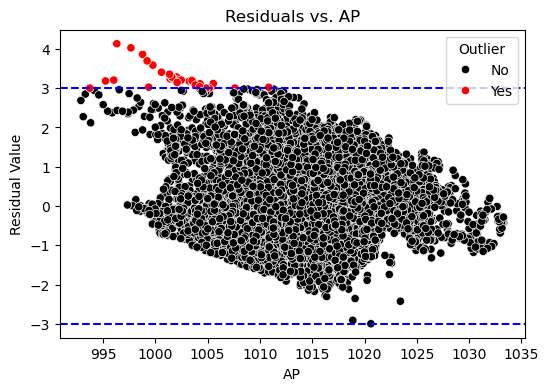

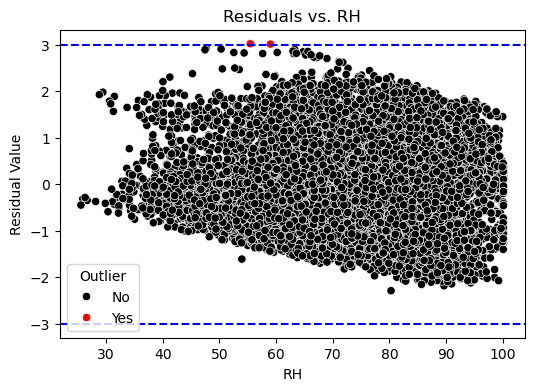

In [427]:
import statsmodels.api as sm
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

outlier_results = {}

for predictor in predictors:  
    X = data[[predictor]]
    X = sm.add_constant(X)  
    y = data[response]  

    # Fit OLS model
    model = sm.OLS(y, X).fit()
    
    # Calculate externally studentized residuals
    influence = model.get_influence()
    ext_standard_residual = influence.resid_studentized_external

    # Define outliers (residuals > 3 or < -3)
    residual_category = ['Yes' if (r > 3) | (r < -3) else 'No' for r in ext_standard_residual]

    # Create dataframe for visualization
    res_diclist = {predictor: data[predictor], 'Residual Value': ext_standard_residual, 'Outlier': residual_category}
    res_dataset = pd.DataFrame(res_diclist)

    # Store results for reference
    outlier_results[predictor] = res_dataset

    # Plot residuals
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=predictor, y="Residual Value", hue="Outlier", data=res_dataset, palette={"Yes": "red", "No": "black"})
    plt.axhline(3, color="blue", linestyle="dashed")   
    plt.axhline(-3, color="blue", linestyle="dashed")  
    plt.xlabel(predictor)
    plt.ylabel("Residual Value")
    plt.title(f"Residuals vs. {predictor}")
    plt.legend(title="Outlier")
    plt.show()


#### From the above plots, the points marked in red gives out a higher residual values and are the potential outliers that we might consider removing before performing regression.

### d ) Fit a multiple regression model to predict the response using all of the predictors.Describe your results. For which predictors can we reject the null hypothesis H0:βj= 0?

#### Regression with All variables added

In [431]:
import statsmodels.api as sm
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


X = data[['AT', 'V', 'AP', 'RH']]
y = data['PE']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Fit model on training data
model = sm.OLS(y_train, X_train).fit()

# Predict on training and test data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Compute MSE
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

# Print results
print(model.summary())  # Model summary
print(f"Train MSE: {train_mse:.4f}")
print(f"Test MSE: {test_mse:.4f}")


                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 2.194e+04
Date:                Fri, 14 Feb 2025   Prob (F-statistic):               0.00
Time:                        13:12:43   Log-Likelihood:                -19630.
No. Observations:                6697   AIC:                         3.927e+04
Df Residuals:                    6692   BIC:                         3.930e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        467.8414     11.502     40.673      0.0

#### From the multiple linear regression, it is evident that the R square is better. With all variables included, it is also seen that the features are all with low p-value <0.05, signifying they are all statistically important for the model.

#### We can reject the null hypothesis for all variables since they all somehow contribute to the target variable.




### E) How do your results from 1c compare to your results from 1d? Create a plot displaying the univariate regression coefficients from 1c on the x-axis, and the multiple regression coefficients from 1d on the y-axis. That is, each predictor is displayed as a single point in the plot. Its coefficient in a simple linear regression model is shown on the x-axis, and its coefficient estimate in the multiple linear regression model is shown on the y-axis

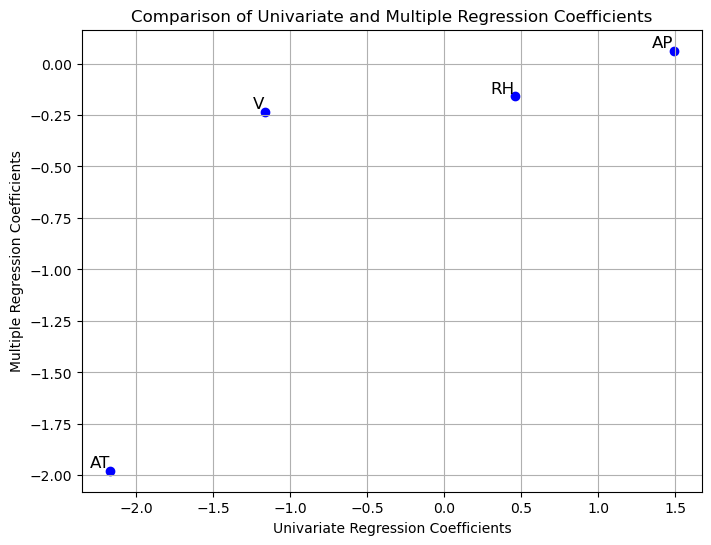

In [434]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np


#data = data.dropna(subset=['AT', 'V', 'AP', 'RH', 'PE'])

X = data[['AT', 'V', 'AP', 'RH']]  # predictors
y = data['PE']  # target

X_np = X.to_numpy()
y_np = y.to_numpy()

X_with_const = sm.add_constant(X_np)  

univariate_coeffs = []
for i, col in enumerate(X.columns):
    X_single = sm.add_constant(X_np[:, i])  # Single predictor with intercept
    model_single = sm.OLS(y_np, X_single).fit()
    univariate_coeffs.append(model_single.params[1])  # Get only the predictor's coefficient

# Fit multiple regression (using all predictors)
model_multiple = sm.OLS(y_np, X_with_const).fit()
multiple_coeffs = model_multiple.params[1:]  # Exclude intercept for comparison

# Create the plot
plt.figure(figsize=(8, 6))
plt.scatter(univariate_coeffs, multiple_coeffs, color='blue')

# Label each point (predictor)
for i, col in enumerate(X.columns):
    plt.text(univariate_coeffs[i], multiple_coeffs[i], col, fontsize=12, ha='right', va='bottom')

# Add labels and title
plt.xlabel('Univariate Regression Coefficients')
plt.ylabel('Multiple Regression Coefficients')
plt.title('Comparison of Univariate and Multiple Regression Coefficients')
plt.grid(True)

plt.show()


### f) Is there evidence of nonlinear association between any of the predictors and the response? To answer this question, for each predictor X, fit a model of the form (quardratic)?


### Polynomial Regression for AT ###

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Fri, 14 Feb 2025   Prob (F-statistic):               0.00
Time:                        13:12:43   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        

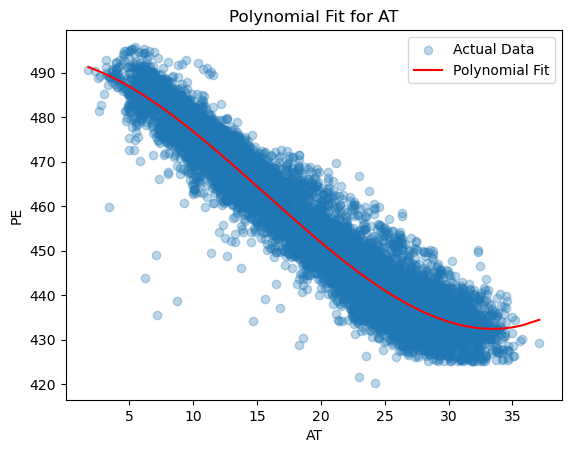


### Polynomial Regression for V ###

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                 1.098e+04
Date:                Fri, 14 Feb 2025   Prob (F-statistic):               0.00
Time:                        13:12:43   Log-Likelihood:                -33585.
No. Observations:                9568   AIC:                         6.718e+04
Df Residuals:                    9564   BIC:                         6.721e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        5

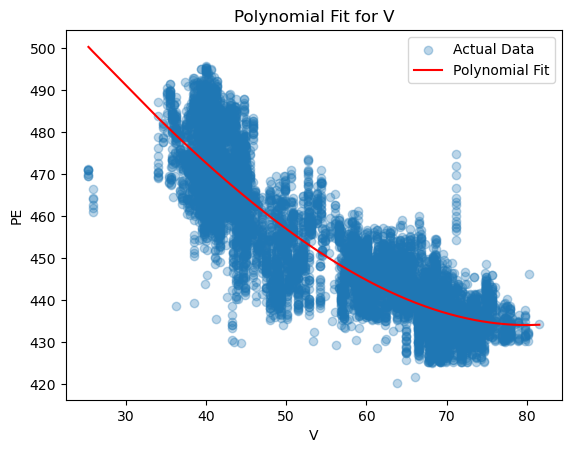


### Polynomial Regression for AP ###

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     1813.
Date:                Fri, 14 Feb 2025   Prob (F-statistic):               0.00
Time:                        13:12:44   Log-Likelihood:                -39184.
No. Observations:                9568   AIC:                         7.837e+04
Df Residuals:                    9565   BIC:                         7.840e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        

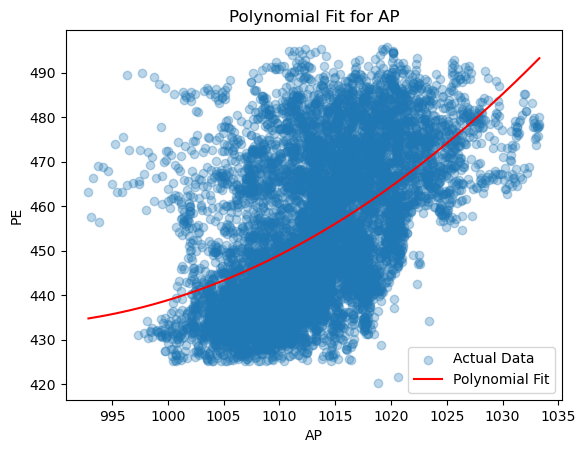


### Polynomial Regression for RH ###

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     579.2
Date:                Fri, 14 Feb 2025   Prob (F-statistic):               0.00
Time:                        13:12:44   Log-Likelihood:                -39923.
No. Observations:                9568   AIC:                         7.985e+04
Df Residuals:                    9564   BIC:                         7.988e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        

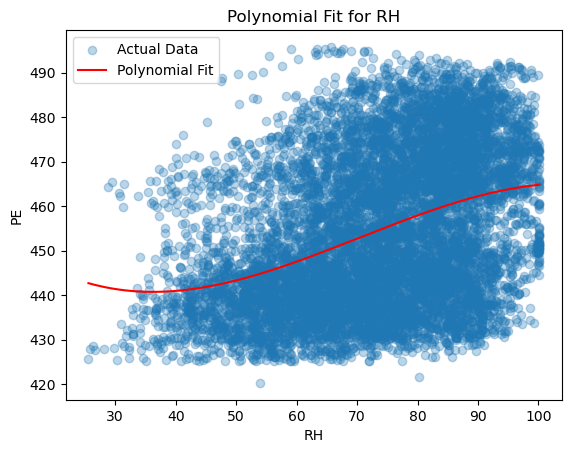

In [436]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

X_vars = ['AT', 'V', 'AP', 'RH'] 
y = data['PE']  

# Loop through each predictor to check for nonlinearity
for var in X_vars:
    print(f"\n### Polynomial Regression for {var} ###\n")
    
    # Prepare polynomial features (X, X^2, X^3)
    X_poly = data[[var]]
    poly = PolynomialFeatures(degree=3, include_bias=False)
    X_poly_transformed = poly.fit_transform(X_poly)
    
    # Convert to DataFrame
    X_poly_df = pd.DataFrame(X_poly_transformed, columns=[var, f"{var}^2", f"{var}^3"])
    
    # Add constant for intercept
    X_poly_df = sm.add_constant(X_poly_df)

    # Fit polynomial regression model
    model = sm.OLS(y, X_poly_df).fit()
    
    # Print model summary
    print(model.summary())

    # Scatterplot with polynomial fit
    plt.scatter(data[var], y, alpha=0.3, label="Actual Data")
    sorted_X = np.sort(data[var])
    predicted_Y = model.predict(sm.add_constant(poly.fit_transform(sorted_X.reshape(-1,1))))
    plt.plot(sorted_X, predicted_Y, color='red', label="Polynomial Fit")
    plt.xlabel(var)
    plt.ylabel("PE")
    plt.title(f"Polynomial Fit for {var}")
    plt.legend()
    plt.show()


#### The polnomial regression has an effect on the model and is significant for all variable, with p value less compared to the p values of variables with lower powers(exponents). Hence, we can conclude that there is a non-linear association between target and the predictors 

### g) Is there evidence of association of interactions of predictors with the response? To answer this question, run a full linear regression model with all pairwise interaction terms and state whether any interaction terms are statistically significant.

In [439]:
import statsmodels.api as sm
import itertools

# Define predictors
predictors = ['AT', 'V', 'AP', 'RH']

interaction_terms = ['{}:{}'.format(x[0], x[1]) for x in itertools.combinations(predictors, 2)]
data_interactions = data.copy()

for term in interaction_terms:
    var1, var2 = term.split(":")
    data_interactions[term] = data_interactions[var1] * data_interactions[var2]


X = data_interactions[predictors + interaction_terms]
y = data_interactions['PE']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Fri, 14 Feb 2025   Prob (F-statistic):               0.00
Time:                        13:12:44   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        685.7825     78.640      8.721      0.0

#### It is seen that there is a statistically significant relationship between the variables interactions - except for the interaction between (AT&AP) and (V&RH), since their p value is higher than 0.05 and is insignificant

### h) Can you improve your model using possible interaction terms or nonlinear associations between the predictors and response? Train the regression model on arandomly selected 70% subset of the data with all predictors. Also, run a regression model involving all possible interaction terms and quadratic nonlinearities, and remove insignificant variables using p-values (be careful about interaction terms). Test both models on the remaining points and report your train and test MSEs

In [442]:
import numpy as np
import pandas as pd
import itertools
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Define predictors
predictors = ['AT', 'V', 'AP', 'RH']
interaction_terms = ['{}:{}'.format(x[0], x[1]) for x in itertools.combinations(predictors, 2)]
quadratic_terms = ['{}^2'.format(x) for x in predictors]

# Create a new DataFrame with interactions and quadratic terms
data_extended = data.copy()

# Generate interaction columns
for term in interaction_terms:
    var1, var2 = term.split(":")
    data_extended[term] = data_extended[var1] * data_extended[var2]

# Generate quadratic terms
for term in quadratic_terms:
    var = term[:-2]  # Remove "^2" from column name
    data_extended[term] = data_extended[var] ** 2

# Define response variable and predictors
X = data_extended[predictors + interaction_terms + quadratic_terms]
y = data_extended['PE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Add constant for intercept
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Fit the full model (all terms included)
full_model = sm.OLS(y_train, X_train).fit()
print(full_model.summary())



                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     7272.
Date:                Fri, 14 Feb 2025   Prob (F-statistic):               0.00
Time:                        13:12:45   Log-Likelihood:                -19160.
No. Observations:                6697   AIC:                         3.835e+04
Df Residuals:                    6682   BIC:                         3.845e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7664.9809   1429.568     -5.362      0.0

#### The p values are greater than 0.05 can be considered to remove. The variables V(0.267), AT:AP (0.197), V:AP(0.381), V:RH (0.867), V^2(0.700) are the ones with high p values and would be insignificant in the model

In [444]:
# (keeping only the values with p values less than 0.05)
significant_vars = full_model.pvalues[full_model.pvalues < 0.05].index
X_train_refined = X_train[significant_vars]
X_test_refined = X_test[significant_vars]

# Fit the refined model
refined_model = sm.OLS(y_train, X_train_refined).fit()
print(refined_model.summary())

# Compute Train and Test MSE
y_train_pred = refined_model.predict(X_train_refined)
y_test_pred = refined_model.predict(X_test_refined)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"Train MSE: {train_mse:.4f}")
print(f"Test MSE: {test_mse:.4f}")


                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.095e+04
Date:                Fri, 14 Feb 2025   Prob (F-statistic):               0.00
Time:                        13:12:45   Log-Likelihood:                -19265.
No. Observations:                6697   AIC:                         3.855e+04
Df Residuals:                    6687   BIC:                         3.862e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -9657.0380   1106.254     -8.729      0.0

### Train MSE: 18.4572
### Test MSE: 19.2210

### i) i) KNN Regression: Perform k-nearest neighbor regression for this dataset using both normalized and raw features. Find the value of k ∈ { 1,2, . . . ,100} that gives you the best fit. Plot the train and test errors in terms.

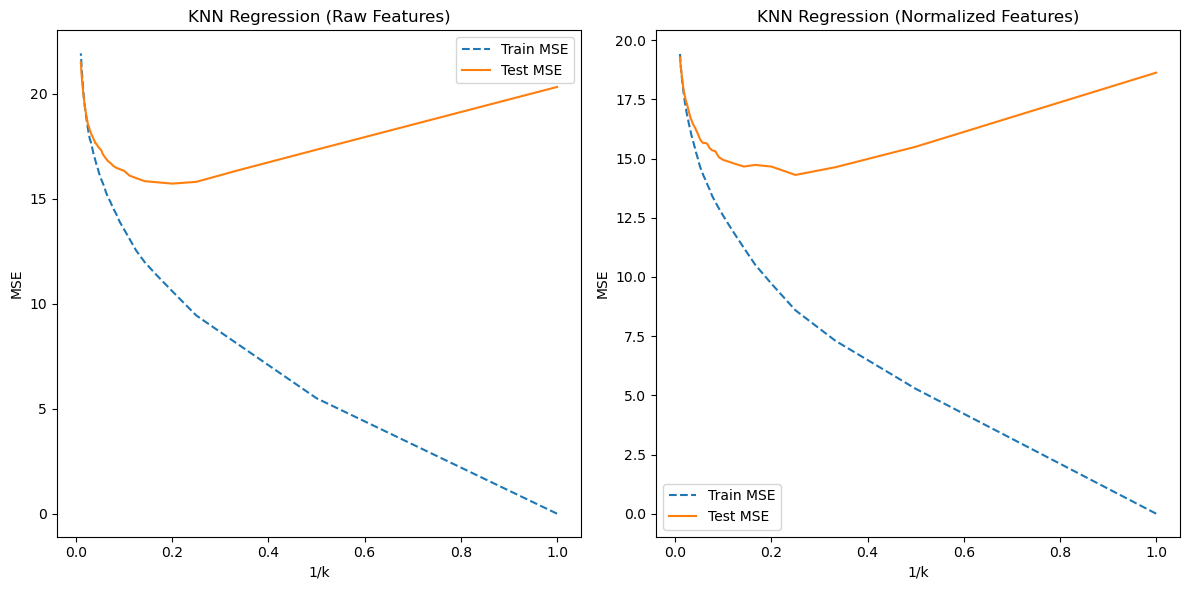

Best k for Raw Features: 5, Test MSE: 15.7268
Best k for Scaled Features: 4, Test MSE: 14.3057


In [447]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Define predictors and response
predictors = ['AT', 'V', 'AP', 'RH']
X = data[predictors]
y = data['PE']

# Split into 70% train, 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Store errors
train_errors_raw, test_errors_raw = [], []
train_errors_scaled, test_errors_scaled = [], []

# Loop over k values from 1 to 100
k_values = range(1, 101)
for k in k_values:
    # KNN on raw features
    knn_raw = KNeighborsRegressor(n_neighbors=k)
    knn_raw.fit(X_train, y_train)
    y_train_pred_raw = knn_raw.predict(X_train)
    y_test_pred_raw = knn_raw.predict(X_test)
    train_errors_raw.append(mean_squared_error(y_train, y_train_pred_raw))
    test_errors_raw.append(mean_squared_error(y_test, y_test_pred_raw))
    
    # KNN on normalized features
    knn_scaled = KNeighborsRegressor(n_neighbors=k)
    knn_scaled.fit(X_train_scaled, y_train)
    y_train_pred_scaled = knn_scaled.predict(X_train_scaled)
    y_test_pred_scaled = knn_scaled.predict(X_test_scaled)
    train_errors_scaled.append(mean_squared_error(y_train, y_train_pred_scaled))
    test_errors_scaled.append(mean_squared_error(y_test, y_test_pred_scaled))

# Plot Train & Test Errors vs. 1/k
plt.figure(figsize=(12, 6))

# Raw Features Plot
plt.subplot(1, 2, 1)
plt.plot(1 / np.array(k_values), train_errors_raw, label='Train MSE', linestyle='dashed')
plt.plot(1 / np.array(k_values), test_errors_raw, label='Test MSE', linestyle='solid')
plt.xlabel('1/k')
plt.ylabel('MSE')
plt.title('KNN Regression (Raw Features)')
plt.legend()

# Scaled Features Plot
plt.subplot(1, 2, 2)
plt.plot(1 / np.array(k_values), train_errors_scaled, label='Train MSE', linestyle='dashed')
plt.plot(1 / np.array(k_values), test_errors_scaled, label='Test MSE', linestyle='solid')
plt.xlabel('1/k')
plt.ylabel('MSE')
plt.title('KNN Regression (Normalized Features)')
plt.legend()

plt.tight_layout()
plt.show()

# Find best k (lowest test error)
best_k_raw = k_values[np.argmin(test_errors_raw)]
best_k_scaled = k_values[np.argmin(test_errors_scaled)]

print(f"Best k for Raw Features: {best_k_raw}, Test MSE: {min(test_errors_raw):.4f}")
print(f"Best k for Scaled Features: {best_k_scaled}, Test MSE: {min(test_errors_scaled):.4f}")


### j) Model Comparison

##### For Multiple Linear Regression

Train MSE: 20.5808
Test MSE: 21.2399


##### The Performance of Linear Regression with Interaction and exponential components with insignificant features removed:

Train MSE: 18.4572
Test MSE: 19.2210

##### KNN with Raw Data:

Test MSE : 15.7268

##### KNN with Normalized Data:

Test MSE :  14.3057

 ### 2.4.1. For each of parts (a) through (d), indicate whether we would generally expect the performance of a flexible statistical learning method to be better or worse than an inflexible method. Justify your answer.

#### (a) The sample size n is extremely large, and the number of predictors p is small.

Ans: Considering a large n value and less features, the model would need a highly flexible method to fit and generalize well.

#### (b) The number of predictors p is extremely large, and the number of observations n is small.

Ans: This leads to high dimensionality in the data, highly flexible methods might overfit. So inflexible methods are better,

#### (c) The relationship between the predictors and response is highly non-linear.

Ans: Flexible methods would be needed to capture the relationship.

#### (d) The variance of the error terms, i.e. σ2 = Var(ε), is extremely high.

Ans: This means there are outliers and inflexible methods would be better to avoid overfitting to noise.

### 2.4.7. The table below provides a training data set containing six observations, three predictors, and one qualitative response variable. Suppose we wish to use this data set to make a prediction for Y when X1 = X2 = X3 = 0 using K-nearest neighbors.

#### (a) Compute the Euclidean distance between each observation and the test point,X1 =X2 =X3 =0.
Ans : Euclidean Dist of obs 1 : 3,
    Euclidean Dist of obs 2 : 2,
    Euclidean Dist of obs 3 : 3.162,
    Euclidean Dist of obs 4 : 2.236,
    Euclidean Dist of obs 5 : 1.414,
    Euclidean Dist of obs 6 : 1.732

#### (b) What is our prediction with K = 1? Why?
Ans : With K=1, the color is Green since the distance is smallest to Green

#### (c) What is our prediction with K = 3? Why?
Ans: With K=3, the color is Red, because the distance metric from obs5,2 and 6 are the three closest and their color is Red.

#### (d) If the Bayes decision boundary in this problem is highly non- linear, then would we expect the best value for K to be large or small? Why?
Ans: When the K value is high, it boundary becomes inflexible and would potentially learn extremities and outliers. So for a non linear problem, having a lower k value is best.

